In [2]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, OscillatoryIntegrals, 
        SpecialFunctions
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\H{{\mathbb H}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\FF{{\cal F}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqand{\qquad\hbox{for}\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\norm#1{\left\|#1\right\|}
\def\half{{1 \over 2}}
\def\fL{f_{\rm L}}
\def\fR{f_{\rm R}}
$$

Dr Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes



# Lecture 21: Laplace transforms

Our goal is to solve the integral equation
$$
\lambda u(x) + \int_{0}^\infty K(x-t)u(t) \dt = f(x)\qqfor 0 < x < \infty.
$$
A key tool will be the half-Fourier transforms
$$
\int_{-\infty}^0 u(t) \E^{-\I s t} \dt \qqand \int_0^\infty u(t) \E^{-\I s t} \dt
$$
and the Laplace transform
$$
\int_0^\infty u(t) \E^{-z t} \dt
$$
in particular we are interested in the analyticity properties with respect to $s$/$z$. 

Outline:

2.  Analyticity properties of Fourier transforms
   - Inverse Fourier transform on shifted contours
1. Half-Fourier transforms
   - Inverting the Half-Fourier transform
   - Relationship to Laplace transform
2. Application: solving differential equations on the half-line

## Analyticity properties of Fourier transforms


Consider the Fourier transform of 
$$
\sech x = {2 \over \E^x + \E^{-x}}
$$
This function has exponential decay in both directions:

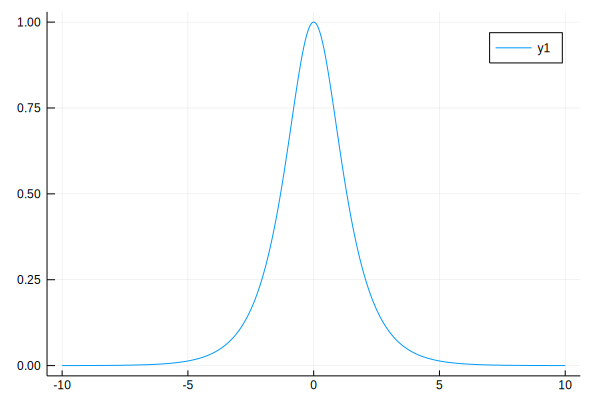

In [5]:
xx = -10:0.01:10
plot(xx,sech.(xx))

Now the Fourier transform of $\sech x$ is
$$
\FF\sech(s) = \int_{-\infty}^\infty \sech t \, \E^{-\I s t} \dt = \pi \sech{\pi s \over 2}
$$
This is calculated via Residue theorem with a bit of work.

In [6]:
f = Fun(sech, Line())
fourier(f, 2.0)

0.2710149513994194 + 0.0im

In [7]:
π*sech(π*2.0/2)

0.2710149513994184

Note that
$$
\pi \sech {\pi z \over 2} = {2 \pi \over \E^{\pi z \over 2} + \E^{-{\pi z \over 2}}}
$$
is analytic for $-1 < \Im z < 1$.

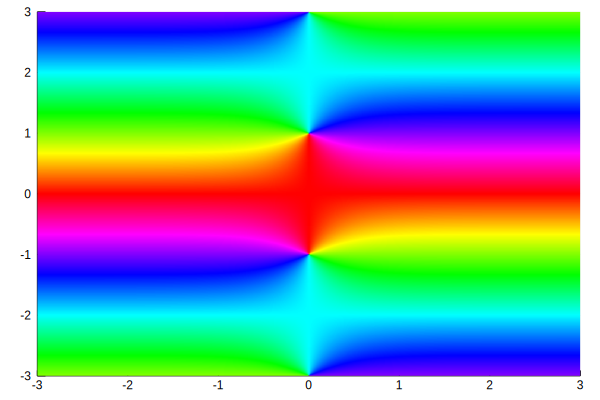

In [9]:
phaseplot(-3..3, -3..3, z -> π*sech(π*z/2))

This is because of the expontial decay. 

**Theorem (Analyticity of Fourier transforms)** Suppose $|f(x) \E^{\gamma x}| < |M(x)|$ where $M$ is absolutely integrable for all $a < \gamma < b$. Then 
$$
\widehat f(z) = \int_{-\infty}^\infty f(t) \E^{-\I z t} \dt
$$
is analytic for $a < \Im z < b$.

**Proof** Let $z = s + \I \gamma$ and note that $|f(t) \E^{\I z t}| = |f(t) \E^{\gamma t}|$. Thus for $a < \gamma < b$, we can exchange differentiation and integration to get
$$
{\D \widehat f \over \dz} = -\I z \hat f(z)
$$
⬛️

**Remark** We don't need $f$ to be analytic at all!  Decay in $f$ gives analyticity.

In the case of $\sech x$, we get exponential decay in both directions: that is $\sech x \E^{|\gamma| x}$ is absolutely integrable for $\gamma < 1$.

Another example is $\E^{-x^2/2}$, which is absolutely integrable for any $\gamma$. Therefore, it's Fourier transform is in fact entire:
$$
\FF[\E^{-\diamond^2/2}](z) = \sqrt{2\pi} \E^{-{z^2 \over 2}}
$$


### Inverse Fourier transform on shifted contours

A neglected fact of the Fourier transform is that we can think of $\hat f(z)$ living on any line $(-\infty + \I \gamma, \infty+\I \gamma)$, and in fact we can recover $f$ from the Fourier transform only on this line. This works even if $\hat f(s)$ is not defined on the real-axis, the real-axis is NOT special!

**Theorem** Suppose $f(x) \E^{\gamma x}$ is square integrable. Then 
$$
f(x) = {1 \over 2 \pi} \int_{-\infty+\I \gamma}^{\infty + \I \gamma} \widehat f(\zeta) \E^{\I x \zeta} \D \zeta
$$

**Proof**  Note for $g(x) = f(x) \E^{\gamma x}$ 
$$
\widehat g(s) = \int_{-\infty}^\infty f(t) \E^{\gamma t - \I s t} \dt = \widehat f(s + \I \gamma).
$$
Therefore we have
\begin{align*}
\E^{\gamma x} f(x) &= g(x) = \FF^{-1} \widehat g(x) = {1 \over 2 \pi} \int_{-\infty}^{\infty} \widehat g(s) \E^{\I x s} \D s  ={1 \over 2 \pi} \int_{-\infty}^{\infty} \widehat f(s + \I \gamma) \E^{\I x s} \D s \\
   & = {1 \over 2 \pi} \int_{-\infty+ \I \gamma}^{\infty+ \I \gamma} \widehat f(\zeta) \E^{\I x (\zeta - \I \gamma)} \D \zeta \\
    &= {1 \over 2 \pi} 
   \E^{\gamma x}  \int_{-\infty+ \I \gamma}^{\infty+ \I \gamma} \widehat f(\zeta) \E^{\I x \zeta} \D \zeta
\end{align*}
Which shows the result by cancelling out $\E^{\gamma x}$.





## Half-Fourier transforms

Consider now 
$$
\int_0^\infty f(t) \E^{-\I s t} \dt
$$
This is in fact the Fourier transform of $f$ extended to the negative real axis by zero:
$$
\int_{-\infty}^\infty \begin{cases}f(t) & t \geq 0 \\ 0 & \hbox{otherwise} \end{cases} \E^{-\I s t} \dt
$$
To make sure we remember the domain of definition, we introduce the notation:
$$
f_{\rm R}(x) = \begin{cases}f(t) & t \geq 0 \\ 0 & \hbox{otherwise} \end{cases}
$$
and
$$
f_{\rm L}(x) = \begin{cases}f(t) & t < 0 \\ 0 & \hbox{otherwise} \end{cases}
$$
Therefore 
$$
\widehat\fR(s) = \int_0^\infty f(t) \E^{-\I s t} \dt \qqand \widehat\fL(s) = \int_{-\infty}^0 f(t) \E^{-\I s t} \dt
$$

Because it is identically zero on the negative real axis, we immediately get the following:

**Corollary (analyticity of Half-Fourier transform)**  Suppose $f(x)$ is bounded for $x \geq 0$. Then $\widehat{\fR}(z)$ is analytic in the lower half plane 
$$\H_+ = \{ z : \Im z < 0 \}.$$

More generally, $f$ can even have exponential decay: if $f(x) \E^{\gamma x}$ is bounded then $\widehat\fR(z)$ is analytic in $\{z : \Im z < \gamma \}$.  As before, the same inversion formula follows:

**Corollary  (inverting Half-Fourier transform)**  Suppose  $f(x) \E^{\gamma x}$ is square integrable for $x \geq 0$. Then 
$$
f(x) = {1 \over 2 \pi} \int_{-\infty + \I M}^{\infty + \I M} \widehat{\fR}(\zeta) \E^{\I x \zeta} \D \zeta
$$
for any choice of $-\infty < M \leq \gamma$.


**Example** Consider $f(x)  = x \E^{-x}$ for $0 \leq x < \infty$.  Note that $f(x) \E^{\gamma x}$ is square integrable for any $\gamma < 1$, and we have
$$
\widehat\fR(z) = \int_0^\infty t \E^{-t -\I s t} \dt = {1 \over (1+\I s)^2}
$$
is analytic for $\Im z < 1$. Thus for any $M < 1$ we have
\begin{align*}
f(x) &= {1 \over 2 \pi} \int_{-\infty+\I M}^{\infty +\I M}\widehat\fR(\zeta) \E^{\I x \zeta}\D \zeta \\
     &={1 \over 2 \pi} \int_{-\infty+\I M}^{\infty +\I M}{1 \over (1+\I \zeta)^2} \E^{\I x \zeta}\D \zeta
\end{align*}

Since $x > 0$, we can use Residue calculus in the upper-half plane, which confirms the result:
$$
\Res_{z = -\I} {\E^{\I x z} \over  (1+\I z)^2}  = \Res_{z = -\I} {\E^{- x} + \I x \E^{-x} (z +\I) + O(z+\I)^2 \over  -(z-\I)^2}  = -\I x \E^{-x}.
$$
**Example** Consider $f(x) = x$.  This function is not square-integrable, but we have $f(x) \E^{\gamma x}$ is square integrable for any $\gamma < 0$, and we find for $\Im z < 0$
$$
\widehat{\fR}(z) = -{1 \over z^2}
$$
Thus we can still use the result to say, for any $M < 0$, 
$$
f(x) =-{1 \over 2 \pi} \int_{-\infty+\I M}^{\infty +\I M} {1 \over \zeta^2} \E^{\I x \zeta}\D \zeta
$$


Note that the results have corresponding analogues for $\fL$:

**Corollary (analyticity of left Half-Fourier transform)**  Suppose  $f(x) \E^{\gamma x}$  is bounded for $x \leq 0$. Then $\widehat{\fL}(z)$ is analytic for $\{z : \Im z > \gamma \}$.


**Corollary  (inverting left Half-Fourier transform)**  Suppose  $f(x) \E^{\gamma x}$ is square integrable for $x < 0$. Then 
$$
f(x) = {1 \over 2 \pi} \int_{-\infty + \I M}^{\infty + \I M} \widehat{\fL}(\zeta) \E^{\I x \zeta} \D \zeta
$$
for any choice of $\gamma \leq M < \infty $.



### Laplace transforms

Now consider the Laplace transform
$$
\check f(z) = \int_0^\infty f(t) \E^{-z t} \dt
$$
but this is just the half Fourier transform evaluated on the negative imaginary axis!
$$
\check f(z) = \widehat\fR (-\I z)
$$
Thus if $f(x) \E^{\gamma x}$ is square integrable, then $\check f(z)$ is well-defined for $\Re z \geq \gamma$.    

<font color=red>NEVER</font> think of the Laplace transform as a real-valued object: it only makes sense as a complex object. This is seen from the inverse Laplace transform
$$
f(x) = {1 \over 2 \pi \I} \int_{-\I \infty - M}^{\I \infty - M}  \check f(\zeta) \E^{\zeta x} \D \zeta
$$
which is of course just the inverse Fourier transform in disguise.


## Application: solving differential equations on the half-line

Consider the following ODE for $x \geq 0$:
\begin{align*}
u''(x) + 2u'(x) + u(x) = f(x)
\end{align*}
with initial conditions $u(0) = u'(0) = 0$. Note that we have by integration-by-parts
\begin{align*}
\check{u'}(z) = \int_0^\infty u'(t) \E^{-z t} \dt = u(0) + z \int_0^\infty u(t) \E^{-z t} \dt = u(0) + z \check u(z) \\
\check{u''}(z) = u'(0) + z \check{u'}(z) = u'(0) + z u(0) + z^2 \check u(0)
\end{align*}
Thus taking into account the initial conditions, are equation in Laplace space becomes
$$
(z^2 + 2z + 1) \check u(z) = \check f(z)
$$
Hence we have
$$
\check u(z) = {1 \over 2 \pi \I}\int_{-\I\infty-M}^{\I \infty-M} {\check f(\zeta) \over \zeta^2 + 2\zeta+1} \E^{x \zeta} \D \zeta 
$$
Consider the case $f(x) = x$, so that
$$
\check f(z) = {1 \over z^2}
$$
Here we need $M < 0$ hence we are integrating on a contour in the right-half plane.  Using Residue calculus, we have
$$
u(z) = \left(\Res_{z = -1} + \Res_{z=0}\right) {\E^{z x} \over z^2 (z +1)^2} = \Res_{z = -1}  {\E^{-x} +\E^{-x}(x+2) (z+1) +O(z+1)^2 \over  (z +1)^2} + \Res_{z=0} {1 + (x-2) z +O(z)^2 \over  z^2}  \\
 = (x+2)\E^{-x} + x-2
$$


## Laplace transform of rational functions


We now consider the question of calculating Laplace transforms (or equivalently, half-Fourier transforms)
$$
\check f(s) = \int_0^\infty f(t) \E^{-s t} \D t
$$
where $f$ is rational.
We're going to do something seemingly crazy: we'll first calculate the Cauchy transform
$$
\CC[f \E^{-s \diamond}](z) = {1 \over 2 \pi \I} \int_0^\infty {f(t) \E^{-s t} \over t- z} \D t
$$
so that
$$
\check f(s) = -2 \pi \I\lim_{z \rightarrow \infty}  z \CC[f \E^{-s \diamond}](z) 
$$
Note that the exponential decay in the integrand allows us to use Plemelj's lemma: if we find a function $\phi(z)$ such that
1. $\phi(z)$ is analytic off $[0,\infty)$
2. $\lim_{z \rightarrow \infty} \phi(z) = 0$ for any angle of approach
3. $\phi$ has weaker than pole singularities at 0
4. $\phi_+(x) - \phi_-(x) = f(x) \E^{-s x}$


Then we have calculated the Cauchy transform:
$$\phi(z) = \CC[f \E^{-s \diamond}](z).$$


Let's start with $f(x) = 1$ and $s = 1$, that is, what is the Cauchy transform of $\E^{-x}$? Consider the exponential integral:
$$
{\rm Ei}(z) = \int_{-\infty}^z {\E^\zeta \over \zeta} \D \zeta
$$
Without loss of generality, the contour of integration is
$$
(\infty,-1) \cup [-1, z)
$$
that is, a straight line to $-1$ and a straightline from $-1$ to $z$.  Thus we have a branch cut on $[0,\infty)$ which has the jump
$$
{\rm Ei}^+(x) - {\rm Ei}^-(x) = -\oint {\E^\zeta \over \zeta} \D \zeta = -2 \pi \I
$$
where 
$$
{\rm Ei}^\pm(x) = \lim_{\epsilon \rightarrow 0} {\rm Ei}(x\pm\I \epsilon)
$$
Consider
$$
\phi(z) = -{\E^{-z} {\rm Ei}(z) \over 2 \pi \I }
$$
1. This is analytic off $[0,\infty)$
2. Integrating by parts we have decay at $\infty$ in all directions:
$$
\E^{-z} {\rm Ei}(z) = {1  \over z}  - \int_{-\infty}^z {\E^{\zeta-z} \over \zeta^2} \D \zeta = O(z^{-1})
$$
3. $\phi$ has a logarithmic singularity at 0
4. 
$$\phi_+(x) - \phi_-(x) = \E^{-x}.$$

Thus 
$$
\CC[ \E^{-s \diamond}](z) = \phi(s z) = - {\E^{-s z} {\rm Ei}(s z)  \over 2 \pi \I}
$$

Let's make sure I didn't make a mistake. Here we first define Ei:

In [20]:
const ei₋₁ = let ζ = Fun(-50 .. -1)
    sum(exp(ζ)/ζ)
end
function ei(z) 
    ζ = Fun(Segment(-1 , z))
    ei₋₁ + sum(exp(ζ)/ζ)
end

ei (generic function with 1 method)

In [16]:
φ = (z) -> -exp(-z)*ei(z)/(2π*im)

#9 (generic function with 1 method)

The expression matches the Cauchy transform:

In [18]:
t = Fun(0 .. 50)
s = 2.0
z = 2.0+2.0im
sum(exp(-s*t)/(t-z))/(2π*im)

0.02534853710699088 + 0.017828329563678025im

In [21]:
φ(s*z)

0.02534853710699058 + 0.017828329563677824im

We then recover the Laplace transform by taking the limit:
$$
\check 1(s) = -2 \pi \I  \lim_{z\rightarrow \infty} z \phi(s z) = \lim_{z\rightarrow \infty} {z \over s z} = {1 \over s}
$$

What about rational $f$? Do the same trick of subtracting off the singularities. For example, consider $f(z) = 1/(z+1)$. Then
$$
{\phi(s z) - \phi(-s) \over z+1}
$$
satisfies all the necessary properties.

In [23]:
t = Fun(0 .. 50)
s = 2.0
z = 2.0+2.0im
f = 1/(t+1)
sum(exp(-s*t)*f/(t-z))/(2π*im)

0.0174397493357667 + 0.013485355450154557im

In [24]:
(φ(s*z)-φ(-s))/(z+1)

0.017439749335766603 + 0.01348535545015462im

 Therefore, 
$$
\check f(s) = -2 \pi \I  \lim_{z\rightarrow \infty} z {\phi(s z) - \phi(-s) \over z+1}  = 
2 \pi \I \phi(-s) = -\E^{s} {\rm Ei}(-s)
$$

In [25]:
@show sum(exp(-s*t)*f)
@show 2π*im*φ(-s)
@show -exp(s)*ei(-s);

sum(exp(-s * t) * f) = 0.3613286168882254
(2π) * im * φ(-s) = 0.3613286168882283 + 0.0im
-(exp(s)) * ei(-s) = 0.3613286168882283
